# 电商分析报告

# 一，数据信息

数据来源：https://www.heywhale.com/mw/dataset/601e971ab233440015800bc7/file
说明：数据量：564169 原始字段：12

## 字段介绍

Unnamed: 行号
event_time：下单时间
order_id：订单编号
product_id:产品标号
category_id :类别编号
category_code :类别
brand :品牌
price :价格
user_id :用户编号
age :年龄
sex :性别
local:省份

# 二，分析目的

通过分析销售数据来了解在线销售业务的消费情况，分析用户消费数据来分析用户的消费行为，为用户推荐相匹配的商品。

## 分析问题

### 店铺销售情况


每月成交额
每月销售金额
每月消费人数
每月订单数量
每月客单价
不同省份用户数量
不同省份订单数量
不同省份成交金额
订单数随星期分布
订单随小时分布

### 用户消费行为：

## 消费人群分层情况：

按性别分析
按年龄段分析
按喜好品牌分析

In [4]:
#导入第三方库
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#设置中文编码和负号的正常显示
#plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [5]:
#导入数据
df=pd.read_csv(r"E:\Git\GithubWorkSpace\电商分析报告\ZYZ\电子产品销售分析.csv")
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local
0,0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
1,1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南
2,2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
3,3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京
4,4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东


In [6]:
df.describe()

,Unnamed: 0,order_id,product_id,category_id,price,user_id,age
count,5.641690e+05,5.641690e+05,5.641690e+05,5.641690e+05,564169.000000,5.641690e+05,564169.000000
mean,1.792965e+06,2.370552e+18,1.695711e+18,2.272919e+18,208.269324,1.515916e+18,33.184388
std,7.745342e+05,2.025138e+16,3.290688e+17,2.158282e+16,304.559875,2.379056e+07,10.122088
min,0.000000e+00,2.294360e+18,1.515966e+18,2.268105e+18,0.000000,1.515916e+18,16.000000
25%,1.658965e+06,2.353294e+18,1.515966e+18,2.268105e+18,23.130000,1.515916e+18,24.000000
50%,1.861597e+06,2.376886e+18,1.515966e+18,2.268105e+18,87.940000,1.515916e+18,33.000000
75%,2.473370e+06,2.388441e+18,1.515966e+18,2.268105e+18,277.750000,1.515916e+18,42.000000
max,2.633520e+06,2.388441e+18,2.388434e+18,2.374499e+18,18328.680000,1.515916e+18,50.000000


In [7]:
#数据清洗和处理
#数据类型转化
df['event_time'] = pd.to_datetime(df['event_time'].str[:19],format="%Y-%m-%d %H:%M:%S")

In [8]:
df['event_time'] = pd.to_datetime(df['event_time'])

In [9]:
#计算时间变量
df['Month']=df['event_time'].dt.month
df['Day'] = df['event_time'].dt.day
df['Dayofweek']=df['event_time'].dt.dayofweek
df['hour']=df['event_time'].dt.hour

In [10]:
df.head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,Dayofweek,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,4,19


In [11]:
np.sum(df.isnull())

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
Dayofweek             0
hour                  0
dtype: int64

有两列中有数据缺失值，类别列缺失129370条，品牌列缺失27224条，这两列数值缺失对店铺销售情况的分析和用户消费行为的分析没主要影响，但是其他数据有重要影响，所以这两列缺失值由missing填充。

In [12]:
df.fillna('missing').head()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,Dayofweek,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,4,19


In [13]:
np.sum(df.isnull())

Unnamed: 0            0
event_time            0
order_id              0
product_id            0
category_id           0
category_code    129370
brand             27224
price                 0
user_id               0
age                   0
sex                   0
local                 0
Month                 0
Day                   0
Dayofweek             0
hour                  0
dtype: int64

In [14]:
df['category_code'].fillna('missing',inplace=True)
df['brand'].fillna('missing',inplace=True)
np.sum(df.isnull())

Unnamed: 0       0
event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
age              0
sex              0
local            0
Month            0
Day              0
Dayofweek        0
hour             0
dtype: int64

缺失值已全部填充。

In [15]:
#重复值检查和处理
df.duplicated()
df.drop_duplicates()

,Unnamed: 0,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,age,sex,local,Month,Day,Dayofweek,hour
0,0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
1,1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,24.0,女,海南,4,24,4,11
2,2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
3,3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,38.0,女,北京,4,24,4,14
4,4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,missing,karcher,217.57,1.515916e+18,32.0,女,广东,4,24,4,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564164,2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,21.0,男,上海,11,21,5,10
564165,2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,21.0,女,北京,11,21,5,10
564166,2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,19.0,女,上海,11,21,5,10
564167,2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,missing,moulinex,41.64,1.515916e+18,19.0,女,上海,11,21,5,10


# 探索性数据分析

## 店铺销售情况分析


### 每月成交金额

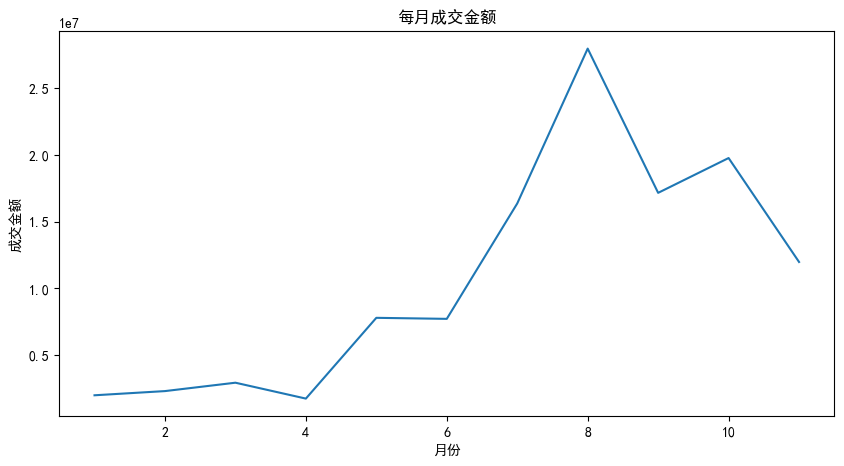

In [16]:
#商店消费情况绘图函数
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
def store_plot(data,xlab,ylab,title):
    plt.figure(figsize=(10,5))
    plt.plot(data)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
#每月成交金额，包含未成单金额
store_plot(data=df[df['price']>0].groupby('Month')['price'].sum(),
          xlab='月份',
          ylab='成交金额',
          title='每月成交金额')

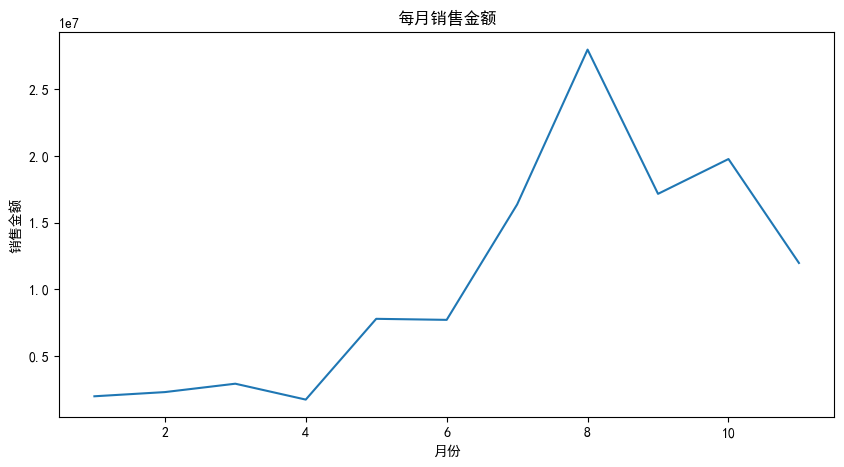

In [17]:
store_plot(data=df.groupby('Month')['price'].sum(),
          xlab = '月份',
          ylab = '销售金额',
          title = '每月销售金额')

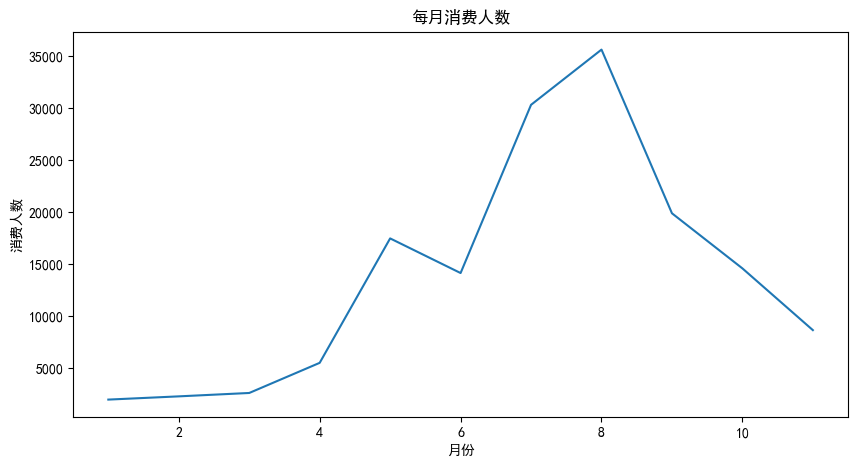

In [18]:
store_plot(data=df[df['price']>0].groupby('Month')['user_id'].nunique(),
          xlab='月份',
          ylab='消费人数',
          title='每月消费人数')

每月消费人数1月到8月呈上升趋势，8到11月呈现下降趋势，由两个高峰期，第一在5月份，第二个高峰期在6月到9月份，推测，可能是五一小长假、暑假和开学季引起了消费人数的上升。

### 每月订单数量


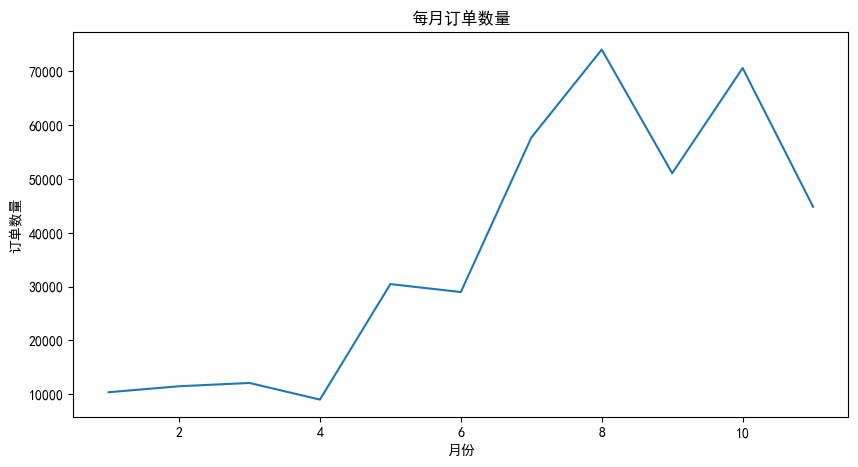

In [20]:
store_plot(data=df[df['price']>0].groupby('Month')['order_id'].nunique(),
          xlab='月份',
          ylab='订单数量',
          title='每月订单数量')

订单数量有三个小高峰，分别在5月，8月，19月，可能与五一小长假，开学季，十一小长假有关。

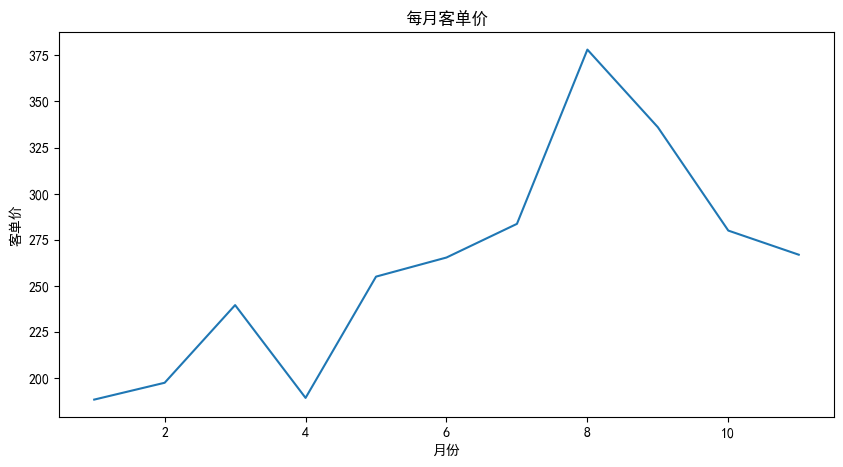

In [21]:
store_plot(data=df[df['price']>0].groupby('Month')['price'].sum()/df[df['price']>0].groupby('Month')['order_id'].nunique(),
          xlab='月份',
          ylab='客单价',
          title='每月客单价')

客单价由2个小高峰，分布在3月和8月，8月份的客单价最高，说明8月份的需求量最高，客单价、订单数量达到顶峰，每年八月份是店铺全年营收的关键期，店铺要提前准备，保证货源供应，满足客户需求量。

1、销售金额和成交金额曲线很相似，意味着销售金额约等于成交金额。
2、月订单数量、月消费人数、月成交金额、月销售额、月客单价趋势相似，在五月份有个小高峰，在八月份是最高峰，销售情况最好的月份集中在7-9月份。店铺可以在1-4月份减少营业人员，5-11月增加营业人员，应对销售高峰期。
3、店铺销售高峰估计和五一小长假、暑假、开学季、十一小长假有关，店铺应该在这几个关键的节点，提前布局，打造竞品，加大库存量，保证货源充足。

### 不同省份用户数量

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

Text(0.5, 1.0, '不同省份用户数量')

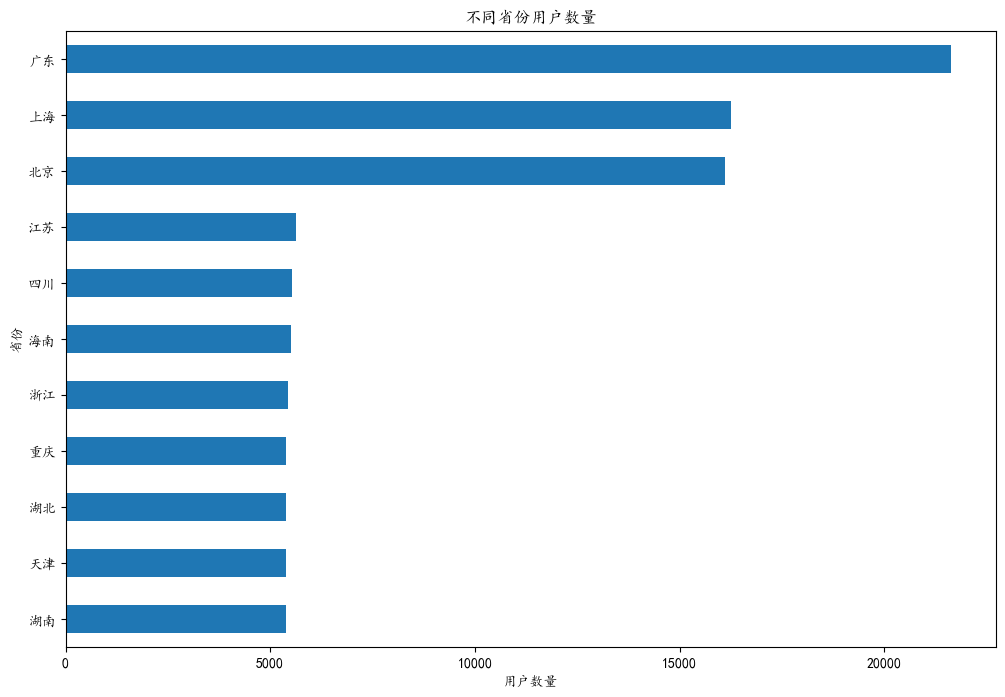

In [23]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['user_id'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('用户数量')
plt.ylabel('省份')
plt.title('不同省份用户数量')

### 不同省份订单数量

Text(0.5, 1.0, '不同省份订单数量')

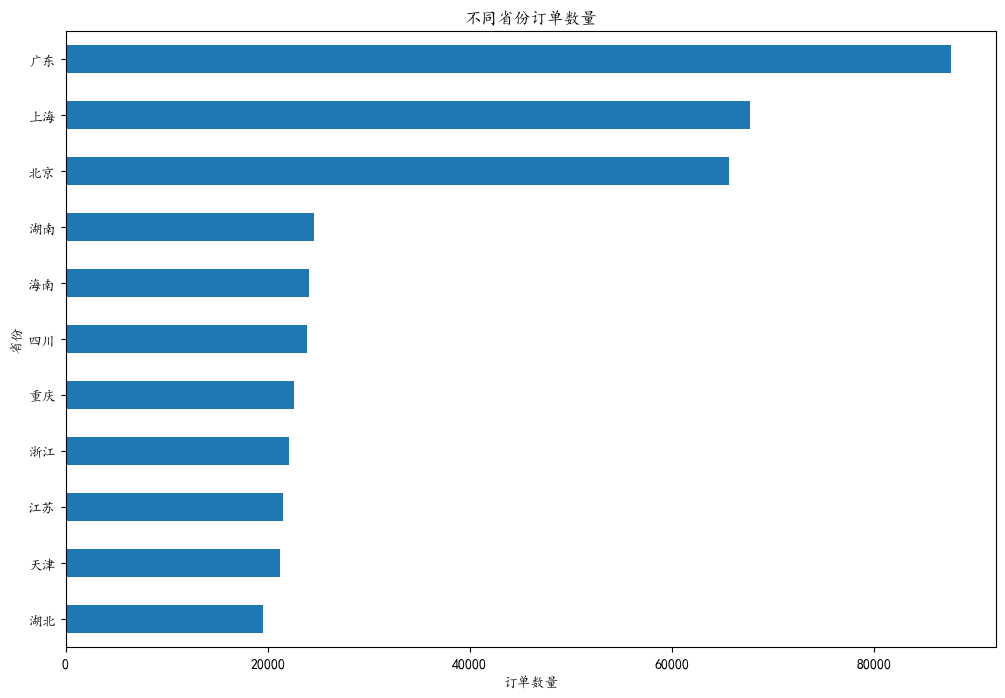

In [24]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['order_id'].nunique().sort_values(ascending=True).plot.barh()
plt.xlabel('订单数量')
plt.ylabel('省份')
plt.title('不同省份订单数量')

### 不同省份成交金额

Text(0.5, 1.0, '不同省份成交金额')

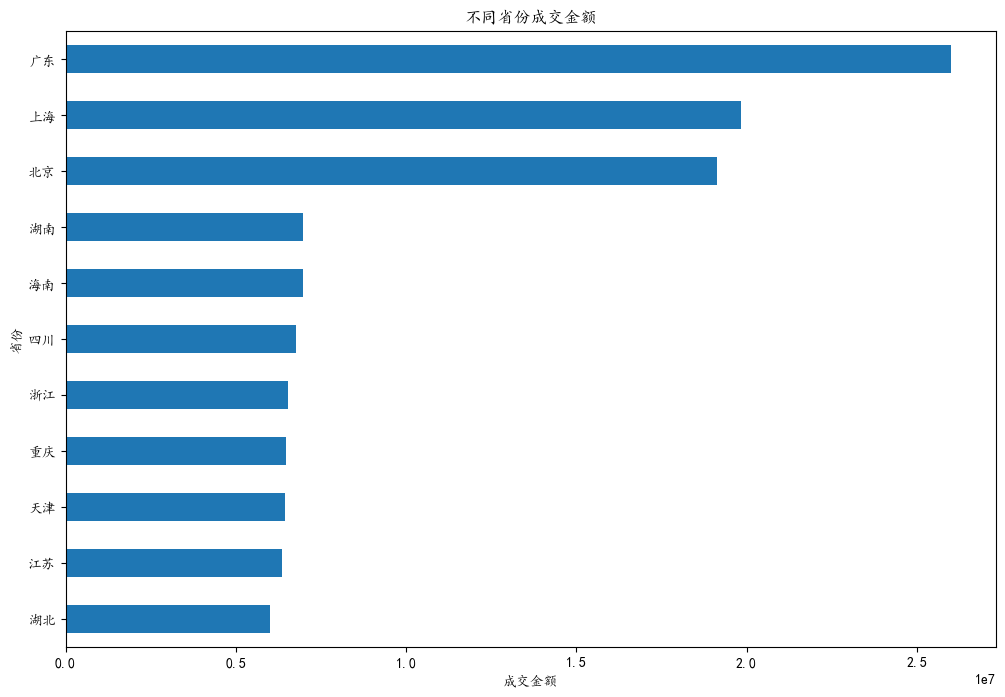

In [25]:
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('local')['price'].sum().sort_values(ascending=True).plot.barh()
plt.xlabel('成交金额')
plt.ylabel('省份')
plt.title('不同省份成交金额')

1、北上广的用户数量、订单数量、成交金额都稳居前三。
2、湖南的客户数量最好，但是订单数，客单价仅次于北上广，湖南客户的潜力巨大，需要加大宣传，增加客户数量。

### 下单星期分布

Text(0.5, 1.0, '订单数随星期变化')

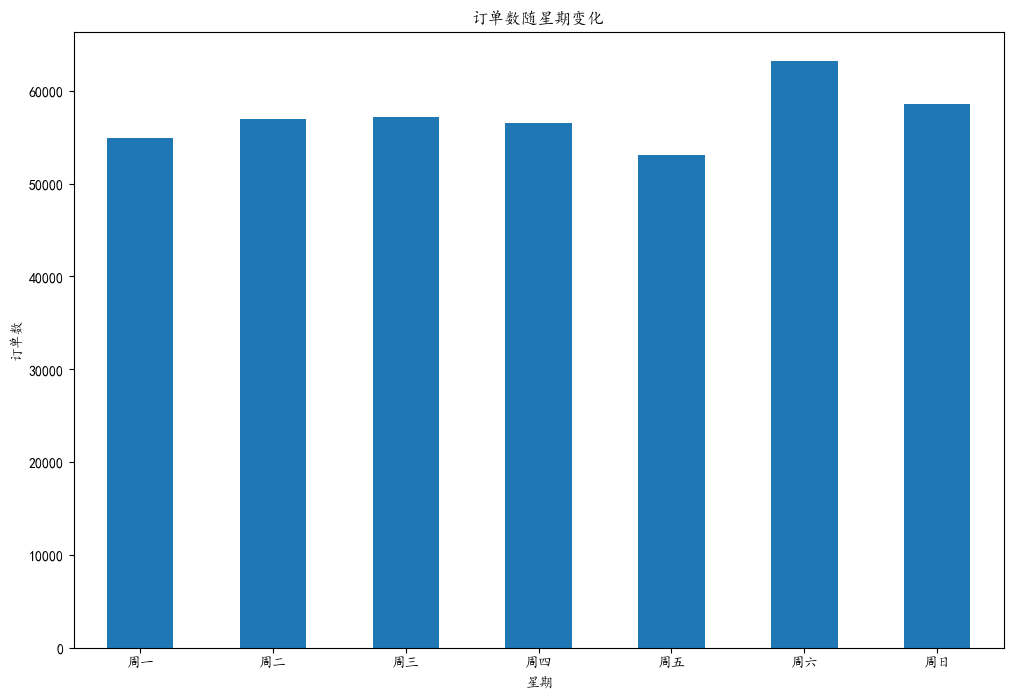

In [26]:
#下单时间分布
#星期
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('Dayofweek')['order_id'].nunique().plot.bar()
plt.xticks(range(7),['周一','周二','周三','周四','周五','周六','周日'],rotation=0)
plt.xlabel('星期')
plt.ylabel('订单数')
plt.title('订单数随星期变化')

周一到周五订单数维持稳定，周六是订单数量最高，周日次之。

### 下单小时分布

Text(0.5, 1.0, '订单随小时数变化')

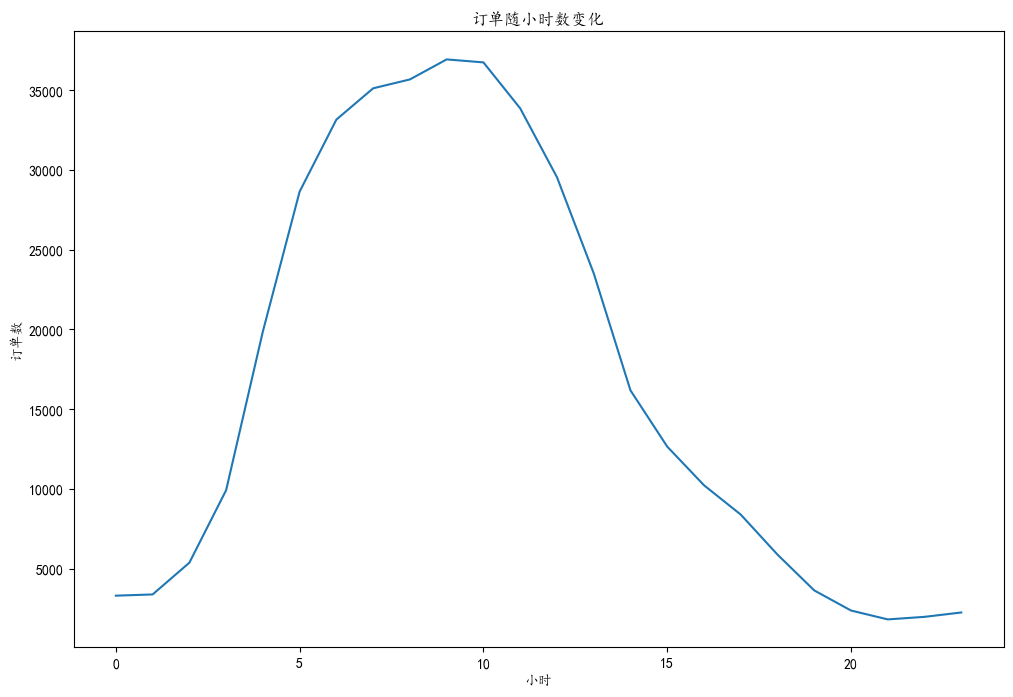

In [28]:
#下单时间分布
#小时
plt.figure(figsize=(12,8))
df[df['price']>0].groupby('hour')['order_id'].nunique().plot()
plt.xlabel('小时')
plt.ylabel('订单数')
plt.title('订单随小时数变化')

订单集中在早晨，8点到13点是消费高峰期，这段时间要注意维持好网站的稳定性。

In [29]:
df[df['price']==0].count() 

Unnamed: 0       39
event_time       39
order_id         39
product_id       39
category_id      39
category_code    39
brand            39
price            39
user_id          39
age              39
sex              39
local            39
Month            39
Day              39
Dayofweek        39
hour             39
dtype: int64

未完成支付的订单只有39单，对比完成支付订单可忽略不计，因此不做未完成订单数、订单金额的统计。

## 用户消费行为分析

### 用户消费次数、用户消费金额

In [31]:
df[df['price']>0].groupby('user_id').agg({'order_id':'nunique',
                                         'price':'sum'}).describe()

,order_id,price
count,93818.000000,93818.000000
mean,4.269074,1252.415276
std,18.191671,4205.922011
min,1.000000,0.020000
25%,1.000000,145.680000
50%,2.000000,460.580000
75%,3.000000,1152.570000
max,666.000000,165439.030000


1、超过一半的用户消费了两次，甚至有用户消费了666次，估计是批发商。
2、客户平均消费金额是1252.4，标准差是4205.9，用户平均消费金额大于75分位数，存在高额消费用户。

In [32]:
### 消费次数与消费金额关系

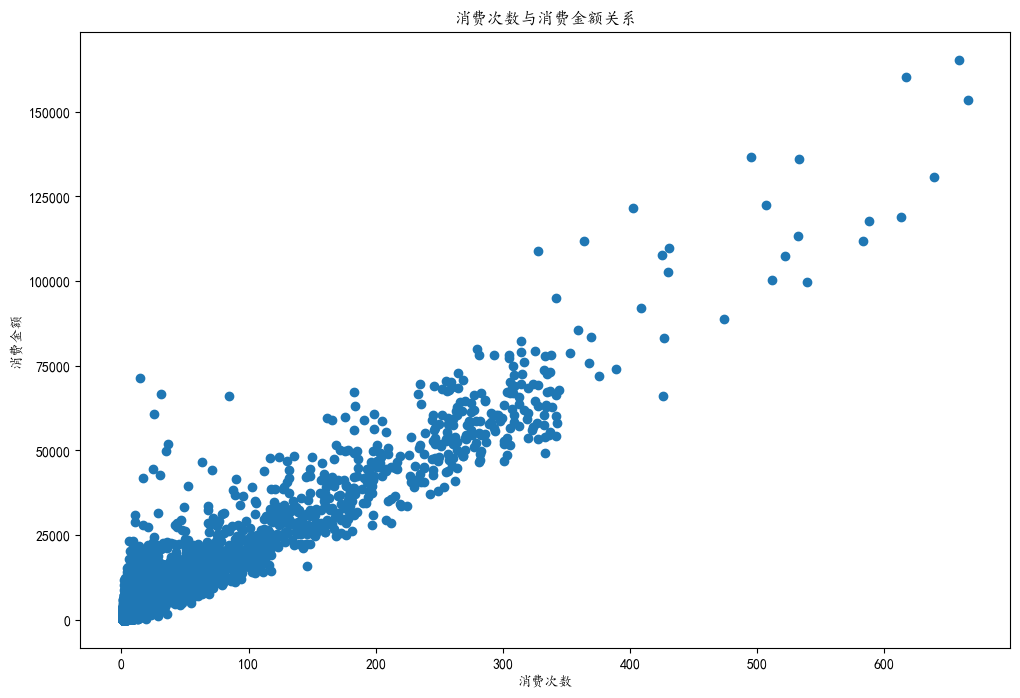

In [33]:
#消费次数与消费金额的关系
plt.figure(figsize=(12,8))
plt.scatter(x=df[df['price']>0].groupby('user_id')['order_id'].nunique(),
           y=df[df['price']>0].groupby('user_id')['price'].sum())
plt.xlabel('消费次数')
plt.ylabel('消费金额')
plt.title('消费次数与消费金额关系')
plt.savefig('消费次数与消费金额关系.jpeg')

消费次数和消费金额存在较强的相关性，用户消费次数越大，消费金额越大，可以引导用户多次消费。

In [34]:
### 用户消费周期

In [35]:
#用户消费周期
purchase_time=df[df['price']>0].groupby('user_id').apply(lambda x: x['event_time']-x['event_time'].shift()).dt.days
purchase_time.describe()

count    470312.000000
mean          9.665354
std         377.617753
min      -18452.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       18557.000000
Name: event_time, dtype: float64

In [36]:
purchase_time[purchase_time>0].describe()

count    125636.000000
mean         46.194204
std         638.377648
min           1.000000
25%           3.000000
50%           9.000000
75%          30.000000
max       18557.000000
Name: event_time, dtype: float64

至少消费两次的用户有一半是9天，75%的消费者消费金额在一个月，可以在8天、29天两个时间点对用户进行推送和提醒

### 新用户数量、活跃用户、不活跃用户、回流用户、回流率

NameError: name 'plot' is not defined

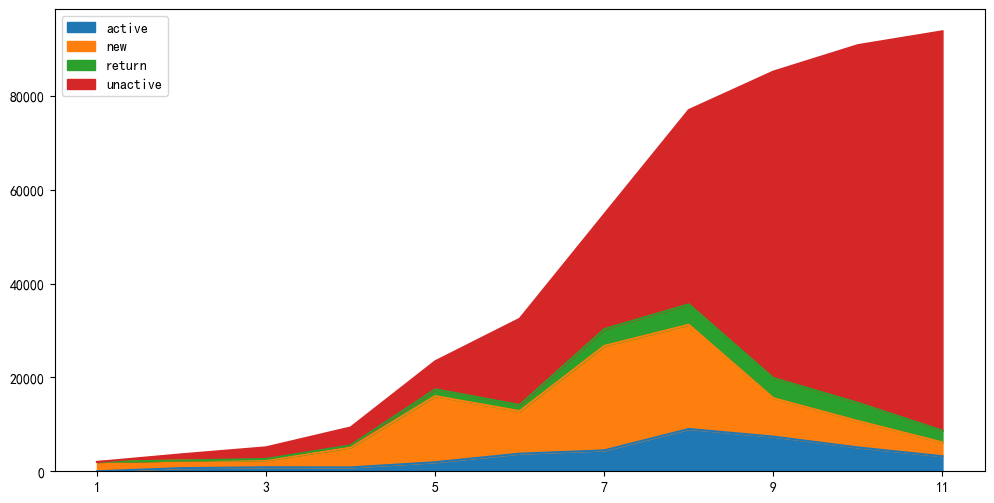

In [37]:
pivoted_amount =df[df['price']>0].pivot_table(index='user_id',
                                             columns='Month',
                                             values='price',
                                             aggfunc='mean').fillna(0)
columns_month = df['Month'].sort_values().astype('str').unique()
pivoted_amount.columns = columns_month
pivoted_purchase = pivoted_amount.applymap(lambda x:1 if x>0 else 0)
#用户分层
def active_status(data):
    status =[]
    for i in range(11):
        #若本月没有消费
        if data[i] ==0:
            if len(status)>0:
                if status[i-1]=='unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
        #若本月消费
        else:
            if len(status)==0:
                status.append('new')
            else:
                if status[i-1]=='unactive':
                    status.append('return')
                elif status[i-1]=='unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status,index=columns_month)
pivoted_purchase_status = pivoted_purchase.apply(lambda x:active_status(x),axis=1)
purchase_status_counts= pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
purchase_status_counts.fillna(0).T.plot.area(figsize=(12,6))
plot.xticks(range(12),columns_month)
plt.title('用户分层')

1、从3月开始，新用户数量逐渐增加，8月份增加最多，8月份以后新用户数量又逐渐减少。
2、从6月份开始，不活跃用户数逐渐增加，而且增速越来越快。
3、回流用户数从5月开始增速较快，到7月份开始报纸稳定。
4、活跃用户数从5月开始大幅增加，7-11月份活跃数量较多，其中8月最多，估计和开学季相关。

### 回流率

Text(0.5, 1.0, '回流率')

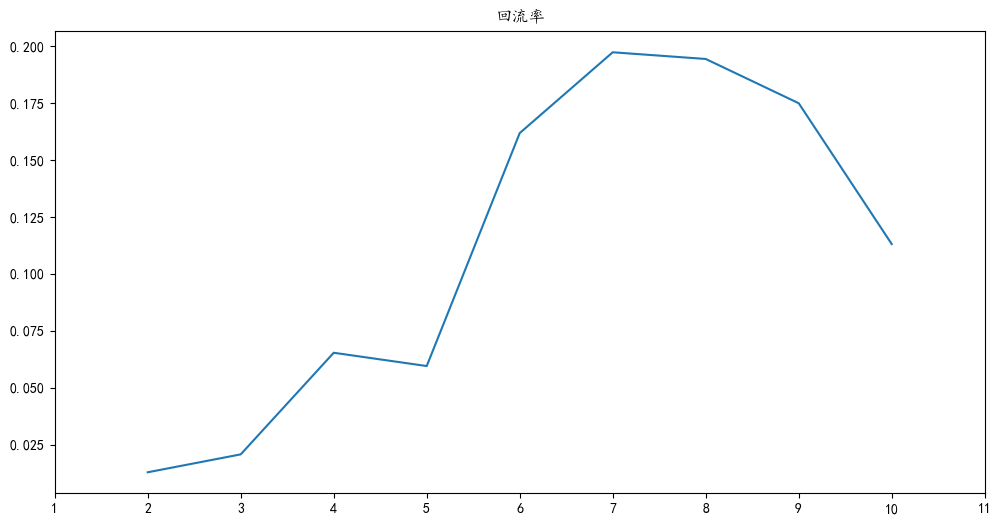

In [41]:
#回流率
return_rate = purchase_status_counts.apply(lambda x:x/x.sum(),axis=1)
return_rate.loc['return'].plot(figsize=(12,6))
plt.xticks(range(1,12),columns_month)
plt.title('回流率')

回流用户从2月到7月呈增加趋势，四月有所回落，五月开始保持快速增长，7月初到达顶峰，7月开始回落但依然保持较高的回流率。

### 复购率

AttributeError: module 'matplotlib.pyplot' has no attribute 'sticks'

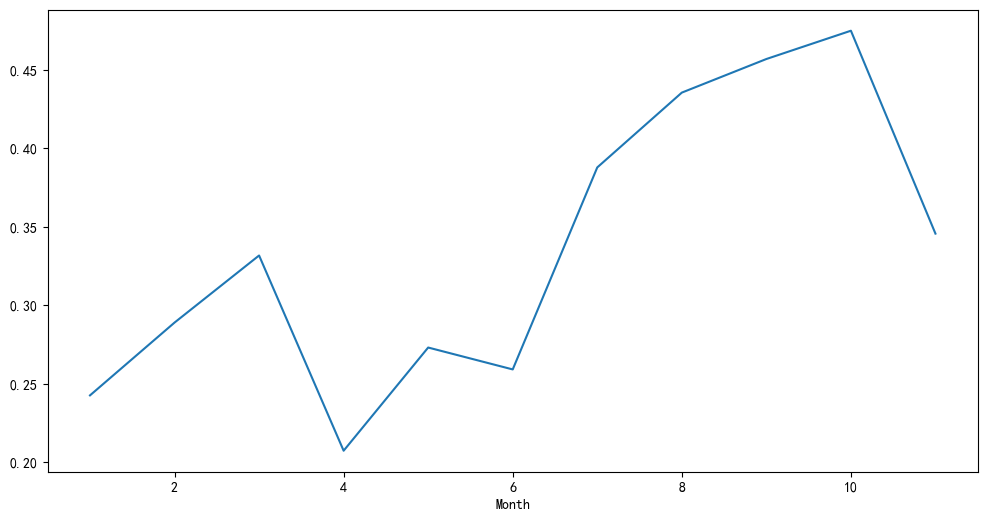

In [45]:
#复购率
pivoted_counts = df[df['price']>0].pivot_table(index='user_id',
                                              columns='Month',
                                             values='order_id',
                                             aggfunc='nunique').fillna(0)
columns_month = df['Month'].sort_values().astype('str').unique()
pivoted_counts_transf = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
(pivoted_counts_transf.sum()/pivoted_counts_transf.count()).plot(figsize=(12,6))
plt.sticks(range(11),columns_month)
plt.title('复购率')

复购率3月、5月、10月有三个小高峰，其中10月份复购率最高，从6月开始到10月复购率一直保持增长。一直保持较高的复购率。其中三个小高峰估计和清明小长假、五一小长假、十一小长假有关。

### 回购率

AttributeError: module 'matplotlib.pyplot' has no attribute 'sticks'

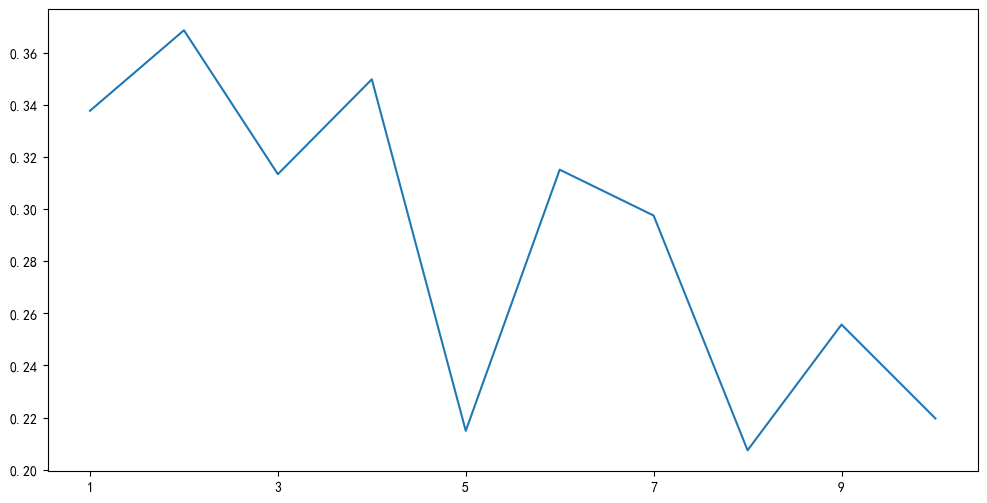

In [46]:
#回购率
def purchase_return(data):
    status = []
    for i in range(10):
        if data[i]==1:
            if data[i+1]==1:
                status.append(1)
            else: 
                status.append(0)
        else :
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status,index=columns_month)
pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)
(pivoted_purchase_return.sum()/pivoted_purchase_return.count()).plot(figsize=(12,6))
plt.sticks(range(11),columns_month)
plt.title('回购率')

回购率从1月到11月总体呈现下降趋势。其中3月、5月、10月下降最厉害，估计和清明小长假、五一小长假、十一小长假有关。

## 消费人群分层情况

### 按性别分析

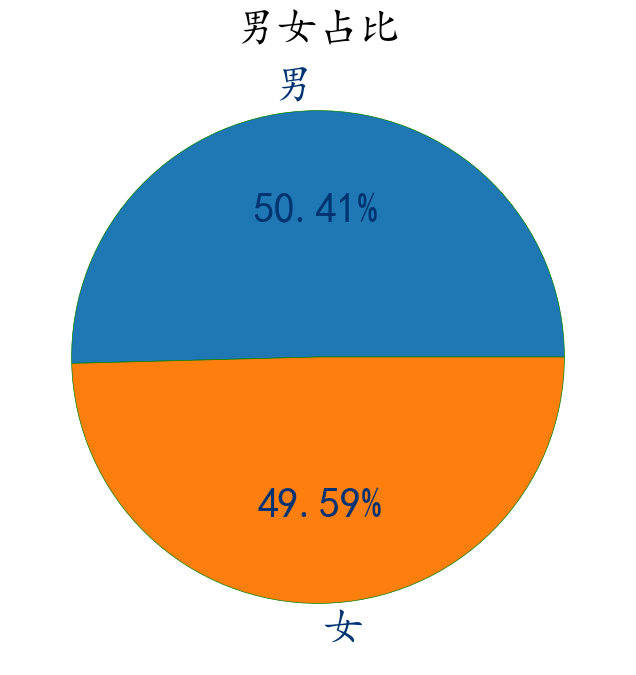

In [47]:
df_sex = df['sex'].value_counts() 
df = df[df['price']>0]
plt.figure(figsize=(8,8))
plt.pie(df_sex.values,labels=df_sex.index,autopct='%.2f%%',
       wedgeprops={'linewidth':0.5,'edgecolor':'green'},
       textprops={'fontsize':30,'color':'#003371'}
       ) 
plt.title('男女占比',size=30)
plt.show()

购买人群男女占比几乎是1:1的情况

In [48]:
df['age'].describe()

count    564130.000000
mean         33.184326
std          10.122218
min          16.000000
25%          24.000000
50%          33.000000
75%          42.000000
max          50.000000
Name: age, dtype: float64

In [49]:
bins=[10,20,30,40,50]
df['age_box'] = pd.cut(df['age'],bins,labels=['10-20','20-30','30-40','40-50'])
age_box = df['age_box'].value_counts()
age_box

40-50    169567
20-30    159756
30-40    156550
10-20     78257
Name: age_box, dtype: int64

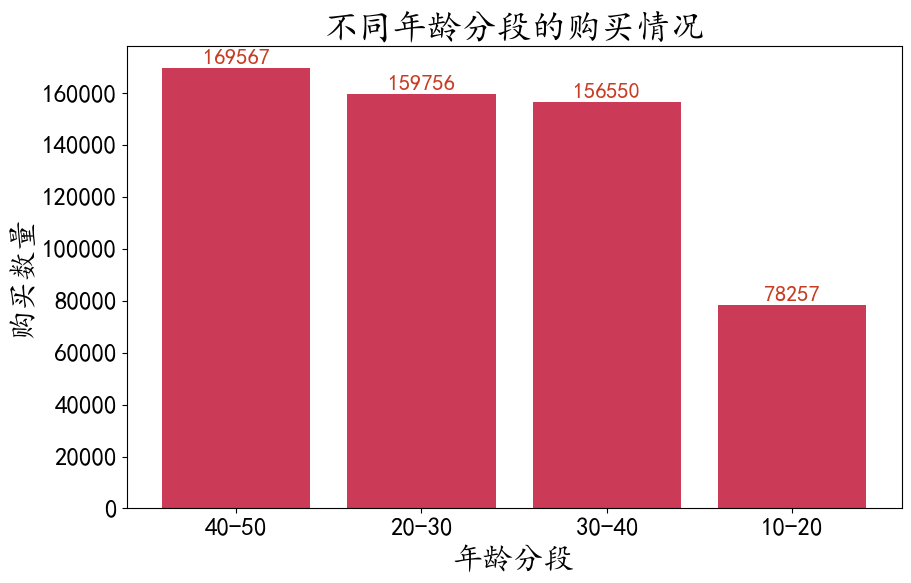

In [50]:
plt.figure(figsize=(10,6))
plt.bar(age_box.index,age_box.values
       ,color='#cb3a56')
plt.ylabel('购买数量',size=22)
plt.xlabel('年龄分段',size=22)
plt.xticks(size=18)
plt.yticks(size=18)
for x,y in zip(age_box.index,age_box.values):
    plt.text(x,y+500,"%d"%y,ha='center',va='bottom',size=16,color='#c83c23')
plt.title('不同年龄分段的购买情况',size=25)
plt.show()

40-50岁的人群是购买主力，20-20岁，30-40岁的购买情况差距不大，10-20岁最少，主要和人群的购买力有关，也可以反映不能的人口结构状况。

In [51]:
df.groupby('age_box')['sex'].value_counts()


age_box  sex
10-20    女      39858
         男      38399
20-30    女      80159
         男      79597
30-40    男      81535
         女      75015
40-50    男      84863
         女      84704
Name: sex, dtype: int64

NameError: name 'df_brand' is not defined

In [60]:
df[df['brand'].isin(df_brand.index)].groupby('sex').describe()['price']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
女,143151.0,287.819252,346.133224,0.02,46.27,173.59,393.5,9606.48
男,144958.0,289.186898,356.553973,0.02,46.27,173.59,393.5,18328.68


In [61]:
df[df['brand'].isin(df_brand.index)].groupby('age_box').describe()['price']

,count,mean,std,min,25%,50%,75%,max
age_box,,,,,,,,
10-20,40064.0,288.570671,345.751456,0.02,48.59,173.59,393.5000,7407.38
20-30,81552.0,291.932090,352.620109,0.02,46.27,173.59,396.1575,9606.48
30-40,80530.0,289.774748,352.117137,0.02,46.27,173.59,393.5000,11574.05
40-50,85963.0,284.041581,352.188401,0.02,46.27,162.01,381.9200,18328.68


不同年龄段人群在购买价格的75%分位上基本一致，但是34-40岁，40-50岁的人群对高价格产品的购买力更强。

### 按喜好品牌分析

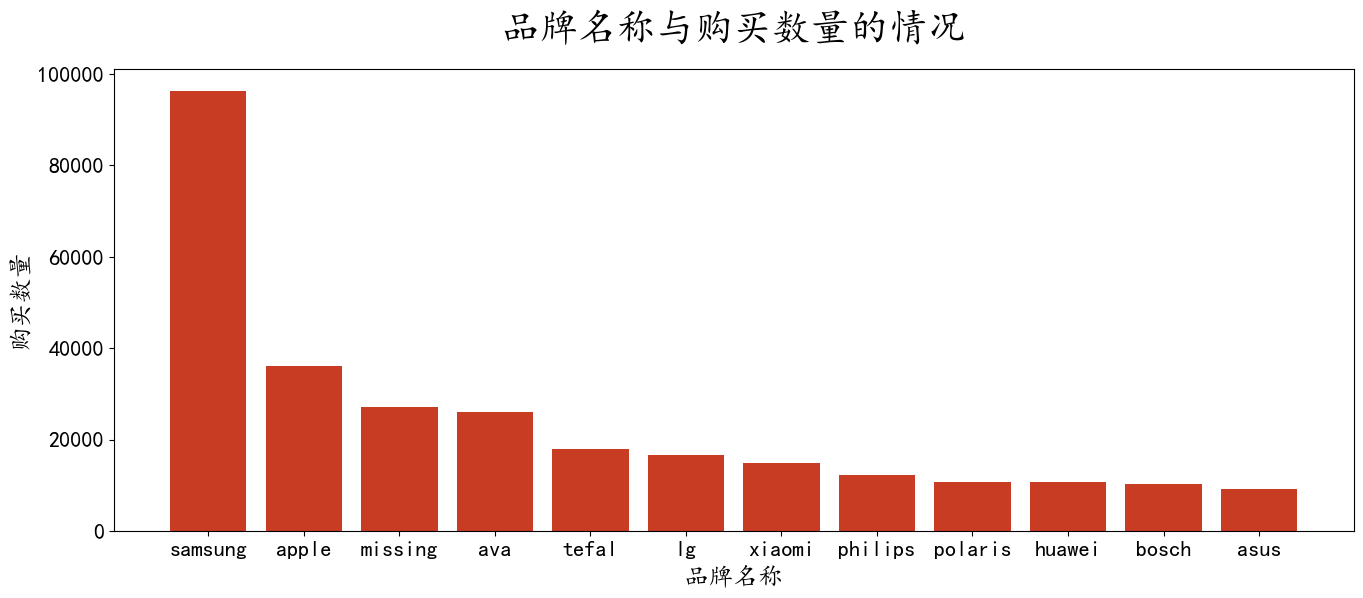

In [54]:
df_brand = df['brand'].value_counts().head(12)
plt.figure(figsize=(16,6))
plt.bar(df_brand.index,df_brand.values,color='#c83c23')
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel("品牌名称",size=18)
plt.ylabel("购买数量",size=18)
plt.title('品牌名称与购买数量的情况',size=28,pad=20)
plt.show()

In [55]:
df['price'].quantile([0,0.25,0.5,0.75,1]).tolist() 

[0.02, 23.13, 87.94, 277.75, 18328.68]

In [56]:
df['price_box'] = pd.cut(df['price'],df['price'].quantile([0,0.25,0.5,0.75,1]).tolist()
                    ,labels=['0.02-23.13','23.13-87.94','87.94-277.75','277.75-18328.68'])
df['price_box'].value_counts()

0.02-23.13         147549
87.94-277.75       142358
277.75-18328.68    139399
23.13-87.94        134173
Name: price_box, dtype: int64

把年龄分为四层，每层的购买人数大致相当

In [57]:
df[df['brand'].isin(df_brand.index)].groupby('brand').describe()['price']

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
apple,36084.0,720.514260,475.576531,2.29,324.05,740.72,925.67,6018.50
asus,9118.0,556.995058,348.708996,13.87,305.53,509.24,763.87,4629.61
ava,26123.0,75.383470,99.421969,0.02,11.55,41.64,138.87,1273.13
bosch,10206.0,327.873193,246.052661,4.84,133.54,300.90,462.94,1527.75
huawei,10722.0,207.689580,156.018227,3.22,127.29,162.01,254.61,1157.38
lg,16696.0,468.235000,332.623621,16.18,300.90,407.38,543.96,11574.05
missing,27215.0,85.832448,245.522559,0.02,4.14,16.18,55.53,18328.68
philips,12151.0,83.750141,102.258354,1.60,37.01,50.90,87.94,1157.38
polaris,10730.0,40.508892,25.025027,4.61,23.13,37.01,47.20,313.63


In [58]:
df.groupby('order_id')[['price']].sum().describe()

,price
count,400516.000000
mean,293.369295
std,397.071623
min,0.020000
25%,41.640000
50%,148.340000
75%,393.500000
max,18699.030000


75%的人群的购买价格是393，说明75%的人群购买力低，后25%的人群对高价格产品的购买力强。

# 三，分析结论

1、销售金额、订单量、消费人数、客单价在清明小长假、五一小长假、暑假、开学季、十一小长假，几个假期节点表现不错，尤其是开学季的情况最好，在几个关键的节点开始前，店铺一定要提前储备库存，保证货源。
2、北上广销售金额、订单量、消费人数、客单价都优于其他省份，湖南省消费人数少，但是客单价、订单量都表现优异，湖南省潜力巨大，因此要加大对湖南省的宣传力度，增加湖南省的消费人数。
3、75%的消费人群购买力不高，对30岁以下的人群主要推荐亲民价格的商品。
4、40-50岁的人群购买力高，而且男性对高价格的商品购买力强，因此给40-50岁的男性推荐高价格的商品，对女性推荐较高价格的商品。
5、多数用户至少消费了两次，且消费金额与购物次数有较强的正相关，用户消费次数越多销售额越大。可在8天、28天对用户进行召回，引导客户消费。
6、订单集中在早晨，8点到13点是消费高峰期，这段时间要注意维持好网站的稳定性。
7、店铺可以在1-4月份减少营业人员，5-11月增加营业人员，应对销售高峰期。